# Lesson 6.03 Random Forests

## Random Forests

With bagged decision trees, we generate many different trees on pretty similar data. These trees are **strongly correlated** with one another. Because these trees are correlated with one another, they will have high variance.


To reduce the variance, we're going to de-correlate our trees. This will reduce our variance (at the expense of a small increase in bias) and thus should greatly improve the overall performance of the final model.

### How do we "de-correlate" our trees?

Random forests differ from bagging decision trees in only one way: they use a modified tree learning algorithm that selects, at each split in the learning process, a **random subset of the features**. This process is sometimes called the *random subspace method*.

The reason for doing this is the correlation of the trees in an ordinary bootstrap sample: if one or a few features are very strong predictors for the response variable (target output), these features will be used in many/all of the bagged decision trees, causing them to become correlated. By selecting a random subset of features at each split, we counter this correlation between base trees, strengthening the overall model.

Random forests, a step beyond bagged decision trees, are **very widely used** classifiers and regressors. They are relatively simple to use because they require very few parameters to set and they perform pretty well.



## Random Forests for Classifcation

In this lesson, we will explore a classification problem, where we will be estimating the species label for iris flowers.

### Load Data

In [1]:
import numpy as np
import pandas as pd

import sklearn.datasets as datasets

from sklearn.model_selection import train_test_split 
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier

In [2]:
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target)

y.columns = ['labels']

print(df.head())
y[0:5]

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


,labels
0,0
1,0
2,0
3,0
4,0


The data set contains information on the:
- sepal length (cm)
- sepal width (cm)  
- petal length (cm)  
- petal width (cm)
- species type

In [3]:
df.isnull().any()==True

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
dtype: bool

In [4]:
print(y.labels.value_counts())

0    50
1    50
2    50
Name: labels, dtype: int64


# Preparing the data for training the model

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=.2, random_state=17)

# Build a Random Forest model

In [6]:
classifier = RandomForestClassifier(n_estimators=200, random_state=0)

y_train_array = np.ravel(y_train)
classifier.fit(X_train, y_train_array)

y_pred = classifier.predict(X_test)

# The Y training data is being stored as a vector in the data frame
# Hence, the vector is required to be converted into a 1-D array
# 1-D arry is the required format for model fitting 
print('y_train.shape is ',y_train.shape)
print('y_train_array.shape is ',y_train_array.shape)

y_train.shape is  (120, 1)
y_train_array.shape is  (120,)


<AxesSubplot:>

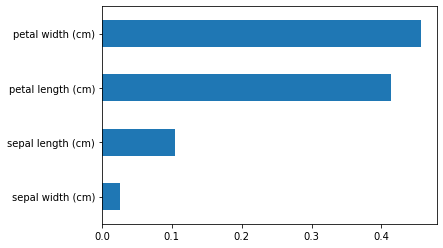

In [7]:
# generate feature importance plot
feat_importances = pd.Series(classifier.feature_importances_, index=df.columns)
feat_importances.sort_values(inplace=True)
feat_importances.plot(kind='barh')

# Evaluating the model on the test data

In [8]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [9]:
y_test_array = np.ravel(y_test)
print(y_test_array)

[0 1 2 1 2 2 1 2 1 2 2 0 1 0 2 0 0 2 2 2 2 0 2 1 1 1 1 1 0 1]


In [10]:
print(y_pred)

[0 1 2 1 2 2 1 2 1 2 2 0 1 0 2 0 0 2 2 2 1 0 2 1 1 1 1 1 0 1]
